### Assignment 2    |   Ben Kavouras    |   1/27/2023

This program compares the time it takes to run through the three methods of solving linear equations. it also verifies the accuracy of computing with the three methods.

In [49]:
# Imports of Fun

# These two are to create the directory and filenames of the charts
from pathlib import Path

# This is to specify the location of my modules
import sys as syeet
syeet.path.append(str(Path().cwd())+"/"+"Modules")

# Time
import time

# Numpy and PyPlot
import numpy as np
import matplotlib.pyplot as plt

# My library
import kavouras1 as k
import textbook as t

# Inline outputs of matplotlib
%matplotlib inline

In [50]:
def runall(a,b,number):

    # Solving with gaussPivot
    start = time.perf_counter()
    output1 = t.gaussPivot(a,b)
    if type(output1) == int:
        return 0
    end = time.perf_counter()
    time1 = end-start

    r1 = np.dot(a,output1) - b

    # Solving with LUpivot
    start = time.perf_counter()
    tempa,seq = t.LUdecomp(a)
    output2 = t.LUsolve(tempa,b,seq)
    end = time.perf_counter()
    time2 = end-start

    r2 = np.dot(a,output2) - b

    # Solving with cramers
    start = time.perf_counter()
    output3 = t.cramers(a,b)
    end = time.perf_counter()
    time3 = end-start

    r3 = np.dot(a,output3) - b

    # numpy also has a built-in method; 'linalg.solve'. This will be tested alongside the other three
    start = time.perf_counter()
    output4 = np.linalg.solve(a,b)
    end = time.perf_counter()
    time4 = end-start

    r4 = np.dot(a,output4) - b

    print("The timings for each method for a "+str(number)+" equation system:")
    print(" gaussPivot | "+str(time1))
    print(" LUpivot    | "+str(time2))
    print(" cramers    | "+str(time3))
    print(" numpy      | "+str(time4))
    if time1 < time2 and time1 < time3 and time1 < time4:
        print(" ")
        print("gaussPivot is the fastest method for a "+str(number)+" equation system")
    elif time2 < time1 and time2 < time3 and time2 < time4:
        print(" ")
        print("LUpivot is the fastest method for a "+str(number)+" equation system")
    elif time3 < time1 and time3 < time2 and time3 < time4:
        print(" ")
        print("cramers is the fastest method for a "+str(number)+" equation system")
    elif time4 < time1  and time4 < time2 and time4 < time3:
        print(" ")
        print("numpy is the fastest method for a "+str(number)+" equation system")

    avgr1 = k.aravg(r1)
    avgr2 = k.aravg(r2)
    avgr3 = k.aravg(r3)
    avgr4 = k.aravg(r4)
    print(" ")
    print("The mean of the values in r for each method:")
    print(" gaussPivot | "+str(avgr1))
    print(" LUpivot    | "+str(avgr2))
    print(" cramers    | "+str(avgr3))
    print(" numpy      | "+str(avgr4))
    if avgr1 < avgr2 and avgr1 < avgr3 and avgr1 < avgr4:
        print(" ")
        print("gaussPivot is the most accurate method for a "+str(number)+" equation system")
    elif avgr2 < avgr1 and avgr2 < avgr3 and avgr2 < avgr4:
        print(" ")
        print("LUpivot is the most accurate method for a "+str(number)+" equation system")
    elif avgr3 < avgr1 and avgr3 < avgr2 and avgr3 < avgr4:
        print(" ")
        print("cramers is the most accurate method for a "+str(number)+" equation system")
    elif avgr4 < avgr1 and avgr4 < avgr2 and avgr4 < avgr3:
        print(" ")
        print("numpy is the most accurate method for a "+str(number)+" equation system")
    else:
        print(" ")
        print("There are multiple accurate methods for a "+str(number)+" equation system")

    return np.array([time1,time2,time3,time4])

In [51]:
# Part 3
a = np.array([[10,-2,-1,2,3,1,-4,7],[5,11,3,10,-3,3,3,-4],[7,12,1,5,3,-12,2,3],[8,7,-2,1,3,2,2,4],[2,-15,-1,1,4,-1,8,3],[4,2,9,1,12,-1,4,1],[-1,4,-7,-1,1,1,-1,-3],[-1,3,4,1,3,-4,7,6]])
b = np.array([[0],[12],[-5],[3],[-25],[-26],[9],[-7]])

print("Part 3")
print(" ")

notimportant = runall(a,b,8)

Part 3
 
The timings for each method for a 8 equation system:
 gaussPivot | 0.0016324000025633723
 LUpivot    | 0.0004769999941345304
 cramers    | 0.00013830000534653664
 numpy      | 2.3999979021027684e-05
 
numpy is the fastest method for a 8 equation system
 
The mean of the values in r for each method:
 gaussPivot | 5.375
 LUpivot    | 0.0
 cramers    | 0.05283418407270127
 numpy      | 1.1102230246251565e-16
 
LUpivot is the most accurate method for a 8 equation system


In [52]:
# Part 4
print("Part 4")
print(" ")
print("2 Equation System")

times2 = 0
while type(times2) == int:
    a2 = np.random.randint(-10,10,(2,2))
    b2 = np.random.randint(-10,10,(2,1))
    times2 = runall(a2,b2,2)

Part 4
 
2 Equation System
Matrix is singular. Unable to pivot
The timings for each method for a 2 equation system:
 gaussPivot | 0.0001145999995060265
 LUpivot    | 7.720000576227903e-05
 cramers    | 6.760001997463405e-05
 numpy      | 4.4199987314641476e-05
 
numpy is the fastest method for a 2 equation system
 
The mean of the values in r for each method:
 gaussPivot | 1.0
 LUpivot    | 2.0
 cramers    | 3.0
 numpy      | 1.1102230246251565e-16
 
numpy is the most accurate method for a 2 equation system


In [53]:
print("4 Equation System")

times4 = 0
while type(times4) == int:
    a4 = np.random.randint(-10,10,(4,4))
    b4 = np.random.randint(-10,10,(4,1))
    times4 = runall(a4,b4,4)

4 Equation System
The timings for each method for a 4 equation system:
 gaussPivot | 0.0004994999908376485
 LUpivot    | 0.00021219998598098755
 cramers    | 8.669999078847468e-05
 numpy      | 4.140002420172095e-05
 
numpy is the fastest method for a 4 equation system
 
The mean of the values in r for each method:
 gaussPivot | 0.0
 LUpivot    | 0.0
 cramers    | 0.0
 numpy      | 0.0
 
There are multiple accurate methods for a 4 equation system


In [54]:
print("6 Equation System")

times6 = 0
while type(times6) == int:
    a6 = np.random.randint(-10,10,(6,6))
    b6 = np.random.randint(-10,10,(6,1))
    times6 = runall(a6,b6,6)

6 Equation System
The timings for each method for a 6 equation system:
 gaussPivot | 0.0005794999888166785
 LUpivot    | 0.00040710001485422254
 cramers    | 0.00010320000001229346
 numpy      | 4.499999340623617e-05
 
numpy is the fastest method for a 6 equation system
 
The mean of the values in r for each method:
 gaussPivot | 0.8333333333333334
 LUpivot    | 0.16666666666666666
 cramers    | 0.16666666666666666
 numpy      | 1.0408340855860843e-17
 
numpy is the most accurate method for a 6 equation system


In [55]:
print("8 Equation System")

times8 = 0
while type(times8) == int:
    a8 = np.random.randint(-10,10,(8,8))
    b8 = np.random.randint(-10,10,(8,1))
    times8 = runall(a8,b8,8)

8 Equation System
The timings for each method for a 8 equation system:
 gaussPivot | 0.0009491000091657043
 LUpivot    | 0.0006587000098079443
 cramers    | 0.0001275000104214996
 numpy      | 4.839999019168317e-05
 
numpy is the fastest method for a 8 equation system
 
The mean of the values in r for each method:
 gaussPivot | 1.625
 LUpivot    | 0.0
 cramers    | 0.13696641561920989
 numpy      | 2.7755575615628914e-17
 
LUpivot is the most accurate method for a 8 equation system


In [56]:
print("12 Equation System")

times12 = 0
while type(times12) == int:
    a12 = np.random.randint(-10,10,(12,12))
    b12 = np.random.randint(-10,10,(12,1))
    times12 = runall(a12,b12,12)

12 Equation System
The timings for each method for a 12 equation system:
 gaussPivot | 0.00319429999217391
 LUpivot    | 0.000836199993500486
 cramers    | 0.0001373999984934926
 numpy      | 2.19999928958714e-05
 
numpy is the fastest method for a 12 equation system
 
The mean of the values in r for each method:
 gaussPivot | 3.75
 LUpivot    | 0.0
 cramers    | 0.11849022604085728
 numpy      | 1.8503717077085943e-16
 
LUpivot is the most accurate method for a 12 equation system


In [57]:
# Times are stored in arrays based off of how big the matrix is, adding to arrays based on the method used
gausstimes = np.array([times2[0],times4[0],times6[0],times8[0],times12[0]])
lutimes = np.array([times2[1],times4[1],times6[1],times8[1],times12[1]])
cramerstimes = np.array([times2[2],times4[2],times6[2],times8[2],times12[2]])
numpytimes = np.array([times2[3],times4[3],times6[3],times8[3],times12[3]])

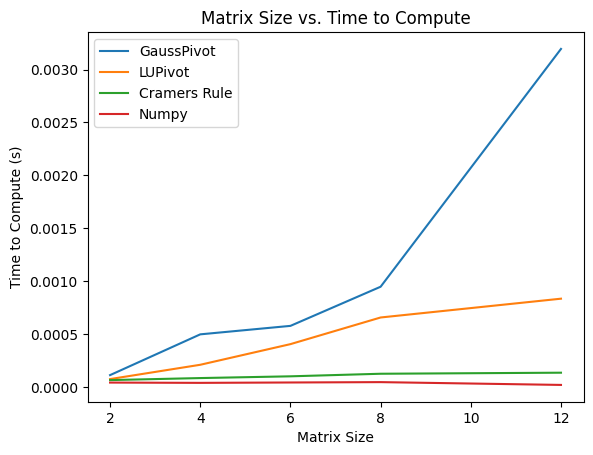

In [58]:
# Creating the charts
x = np.array([2,4,6,8,12])
plt.xlabel("Matrix Size")
plt.ylabel("Time to Compute (s)")
plt.title("Matrix Size vs. Time to Compute")
plt.plot(x,gausstimes)
plt.plot(x,lutimes)
plt.plot(x,cramerstimes)
plt.plot(x,numpytimes)
plt.legend(["GaussPivot","LUPivot","Cramers Rule","Numpy"])
plt.show()

In [59]:
# Part 5
print("Part 5")
print(" ")

print("Method using LUdecomp")
matrix8 = np.array([[27.580,7.004,-7.004,0.000,0.000],[7.004,29.570,-5.253,0.000,-24.320],[-7.004,-5.253,29.570,0.000,0.000],[0.000,0.000,0.000,27.580,-7.004],[0.000,-24.320,0.000,-7.004,29.570]])
decomp8 = t.LUdecomp(matrix8)
invert8 = t.LUinverse(decomp8)
result = np.dot(matrix8,invert8)
result[4][1] = 0.
result = abs(np.around(result, decimals=0))
print(result)

Part 5
 
Method using LUdecomp
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [60]:
print("Method using built in numpy module")

invert8_2 = np.linalg.inv(matrix8)
result2 = np.dot(matrix8,invert8_2)
result2 = abs(np.around(result2, decimals=0))
print(result2)

Method using built in numpy module
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
